In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter

import numpy.random as npr
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp
import seaborn as sns

import sys
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy import optimize
from scipy import stats

import matplotlib.ticker as mtick
from matplotlib import rc
import copy

today = datetime.today()
month = (date.today() - timedelta(days=30))
yesterday = (date.today() - timedelta(days=1))
%matplotlib inline
idx = pd.date_range('17/06/2021', yesterday)

/home/aidin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: UserWarning: Parsing '17/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
!git fetch upstream
!git merge --no-edit upstream/master

remote: Enumerating objects: 1257, done.
remote: Counting objects: 100% (849/849), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 1257 (delta 561), reused 612 (delta 403), pack-reused 408
Receiving objects: 100% (1257/1257), 335.52 KiB | 1.78 MiB/s, done.
Resolving deltas: 100% (784/784), completed with 4 local objects.
From https://github.com/ministero-salute/it-dgc-opendata
   4faac37..f1fec94  master     -> upstream/master
Merge made by the 'ort' strategy.
 data/dgc-acquired-latest.csv  |   2 +-
 data/dgc-acquired-latest.json |   2 +-
 data/dgc-acquired.csv         | 116 ++++++++++++++++++++++++++++++++++++++++++
 data/dgc-acquired.json        |   2 +-
 data/dgc-issued-latest.csv    |   2 +-
 data/dgc-issued-latest.json   |   2 +-
 data/dgc-issued.csv           | 116 ++++++++++++++++++++++++++++++++++++++++++
 data/dgc-issued.json          |   2 +-
 8 files changed, 238 insertions(+), 6 deletions(-)


In [3]:
acquired           = pd.read_csv('../data/dgc-acquired.csv')
issued             = pd.read_csv('../data/dgc-issued.csv'  )
issued['new_date'] = pd.to_datetime(issued.data, format='%Y-%m-%d')
issued.set_index('new_date', inplace=True)
issued.sort_index(inplace=True)
issued.data        = pd.to_datetime(issued['data'], format='%Y-%m-%d').dt.strftime('%d %b %Y')
issued

,data,issued_for_vaccines,issued_for_vaccines_total,issued_for_tests,issued_for_tests_total,issued_for_healing,issued_for_healing_total,issued_all,issued_all_total
new_date,,,,,,,,,
2021-06-17,17 Jun 2021,74210,74210,0,0,0,0,74210,74210
2021-06-18,18 Jun 2021,2017424,2091634,342,342,12,12,2017778,2091988
2021-06-19,19 Jun 2021,3713880,5805514,3143,3485,30,42,3717053,5809041
2021-06-20,20 Jun 2021,4882739,10688253,1226,4711,20,62,4883985,10693026
2021-06-21,21 Jun 2021,6127694,16815947,125351,130062,60566,60628,6313611,17006637
...,...,...,...,...,...,...,...,...,...
2022-06-23,23 Jun 2022,460,129177587,153561,146661374,33283,17798928,187304,293637889
2022-06-24,24 Jun 2022,40102,129217689,157299,146818673,31727,17830655,229128,293867017
2022-06-25,25 Jun 2022,23970,129241659,137474,146956147,20550,17851205,181994,294049011


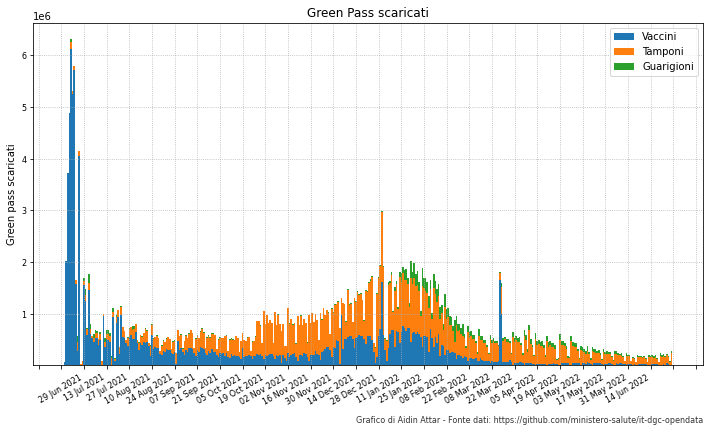

In [4]:
fig, ax = plt.subplots(figsize=(12,7))
#issued[['issued_for_vaccines', 'issued_for_tests', 'issued_for_healing']].plot.bar(ax=ax, stacked=True, width=.8)
ax.bar(issued.data, issued['issued_for_vaccines'],                                                                  width=1)
ax.bar(issued.data, issued[   'issued_for_tests'], bottom=issued['issued_for_vaccines'],                            width=1)
ax.bar(issued.data, issued[ 'issued_for_healing'], bottom=issued['issued_for_tests']+issued['issued_for_vaccines'], width=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')
labels=['Vaccini', 'Tamponi', 'Guarigioni']
ax.legend(labels, loc='upper right')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

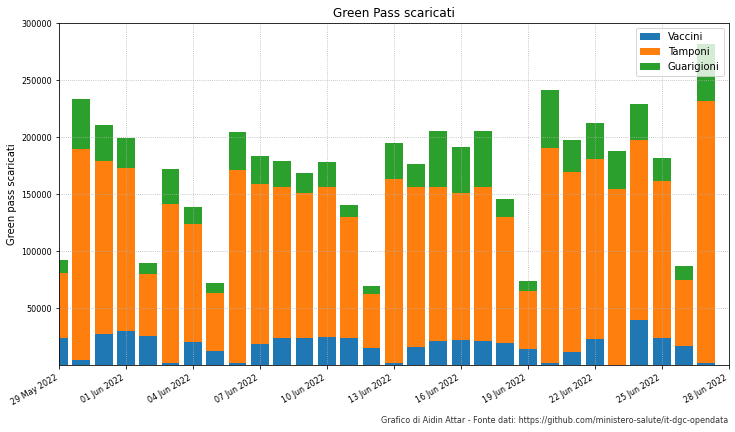

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
#issued[['issued_for_vaccines', 'issued_for_tests', 'issued_for_healing']].plot.bar(ax=ax, stacked=True, width=.8)
ax.bar(issued.data, issued['issued_for_vaccines'],                                                                  width=.8)
ax.bar(issued.data, issued[   'issued_for_tests'], bottom=issued['issued_for_vaccines'],                            width=.8)
ax.bar(issued.data, issued[ 'issued_for_healing'], bottom=issued['issued_for_vaccines']+issued['issued_for_tests'], width=.8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')

ax.set_xlim(left=month.strftime('%d %b %Y'), right=today.strftime('%d %b %Y'))
ax.set_ylim(top=.3e6)
labels=['Vaccini', 'Tamponi', 'Guarigioni']
ax.legend(labels, loc='upper right')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

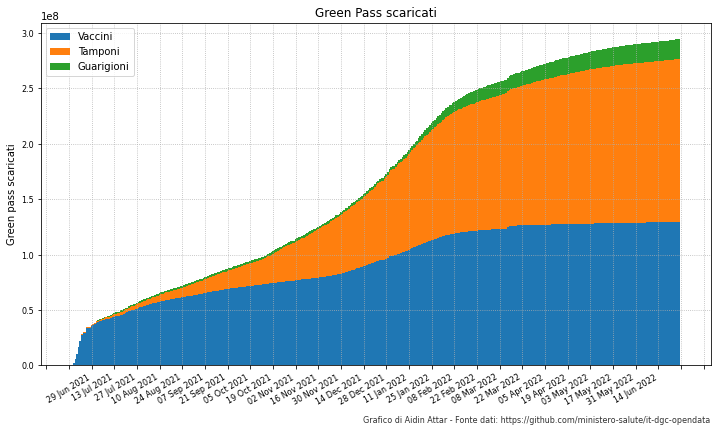

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(issued.data, issued['issued_for_vaccines_total'],                                                                              width=1)
ax.bar(issued.data, issued[   'issued_for_tests_total'], bottom=issued['issued_for_vaccines_total'],                                  width=1)
ax.bar(issued.data, issued[ 'issued_for_healing_total'], bottom=issued['issued_for_vaccines_total']+issued['issued_for_tests_total'], width=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')
labels=['Vaccini', 'Tamponi', 'Guarigioni']
ax.legend(labels, loc='upper left')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

<AxesSubplot:ylabel='Green pass emessi'>

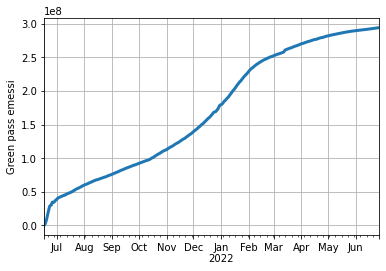

In [7]:
issued['issued_all_total'].plot(xlabel='', ylabel='Green pass emessi', lw=3, grid=1)

In [8]:
acquired['new_date'] = pd.to_datetime(acquired.data, format='%Y-%m-%d')
acquired.set_index('new_date', inplace=True)
acquired.sort_index(inplace=True)
acquired.data        = pd.to_datetime(acquired['data'], format='%Y-%m-%d').dt.strftime('%d %b %Y')
acquired

,data,acquired_by_app_immuni,acquired_by_app_immuni_total,acquired_by_web_ts,acquired_by_web_ts_total,acquired_by_web_id,acquired_by_web_id_total,acquired_by_web_spid,acquired_by_web_spid_total,acquired_by_operator_ts,acquired_by_operator_ts_total,acquired_by_operator_id,acquired_by_operator_id_total,acquired_by_app_io,acquired_by_app_io_total,acquired_all,acquired_all_total
new_date,,,,,,,,,,,,,,,,,
2021-06-17,17 Jun 2021,186,186,1091,1091,0,0,0,0,220,220,0,0,0,0,1497,1497
2021-06-18,18 Jun 2021,11408,11594,54874,55965,0,0,71,71,9555,9775,12,12,69,69,75989,77486
2021-06-19,19 Jun 2021,32675,44269,202661,258626,4,4,568,639,35033,44808,30,42,70826,70895,341797,419283
2021-06-20,20 Jun 2021,44282,88551,253647,512273,4,8,372,1011,66623,111431,0,42,272097,342992,637025,1056308
2021-06-21,21 Jun 2021,119363,207914,707424,1219697,6,14,2252,3263,191579,303010,19,61,797961,1140953,1818604,2874912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,23 Jun 2022,5364,25105964,18566,95850793,234,1025705,21486,74727619,5948,18472340,7953,6855118,71014,236194426,130565,458231965
2022-06-24,24 Jun 2022,6170,25112134,21265,95872058,341,1026046,21807,74749426,5977,18478317,8260,6863378,71892,236266318,135712,458367677
2022-06-25,25 Jun 2022,5409,25117543,16603,95888661,258,1026304,17814,74767240,4715,18483032,6604,6869982,62165,236328483,113568,458481245


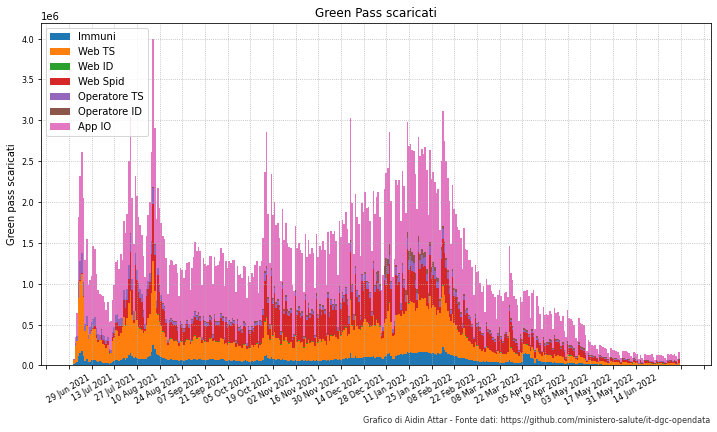

In [9]:
fig, ax = plt.subplots(figsize=(12,7))
#acquired[['acquired_for_vaccines', 'acquired_for_tests', 'acquired_for_healing']].plot.bar(ax=ax, stacked=True, width=.8)
ax.bar(acquired.data, acquired[ 'acquired_by_app_immuni'], width=1)
ax.bar(acquired.data, acquired[     'acquired_by_web_ts'], bottom=acquired['acquired_by_app_immuni'],                                                                                                                                                                        width=1)
ax.bar(acquired.data, acquired[     'acquired_by_web_id'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts'],                                                                                                                                         width=1)
ax.bar(acquired.data, acquired[   'acquired_by_web_spid'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id'],                                                                                                          width=1)
ax.bar(acquired.data, acquired['acquired_by_operator_ts'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid'],                                                                         width=1)
ax.bar(acquired.data, acquired['acquired_by_operator_id'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid']+acquired['acquired_by_operator_ts'],                                     width=1)
ax.bar(acquired.data, acquired[     'acquired_by_app_io'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid']+acquired['acquired_by_operator_ts']+acquired['acquired_by_operator_id'], width=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')
labels=['Immuni', 'Web TS', 'Web ID', 'Web Spid', 'Operatore TS', 'Operatore ID', 'App IO']
ax.legend(labels, loc='upper left')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

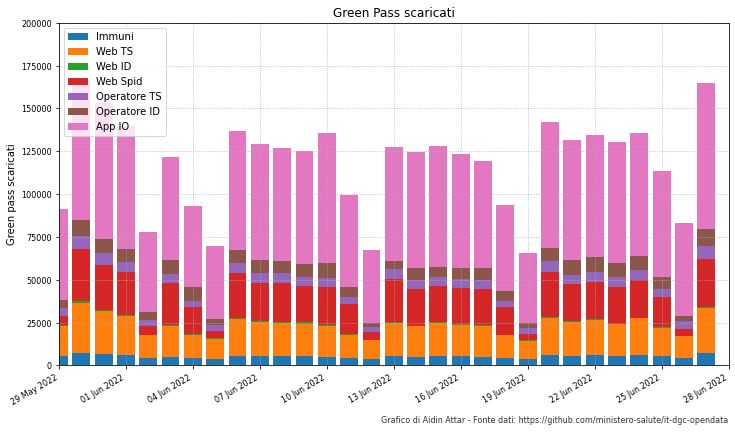

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
#acquired[['acquired_for_vaccines', 'acquired_for_tests', 'acquired_for_healing']].plot.bar(ax=ax, stacked=True, width=.8)
ax.bar(acquired.data, acquired[ 'acquired_by_app_immuni'],                                                                                                                                                                                                                   width=.8)
ax.bar(acquired.data, acquired[     'acquired_by_web_ts'], bottom=acquired['acquired_by_app_immuni'],                                                                                                                                                                        width=.8)
ax.bar(acquired.data, acquired[     'acquired_by_web_id'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts'],                                                                                                                                         width=.8)
ax.bar(acquired.data, acquired[   'acquired_by_web_spid'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id'],                                                                                                          width=.8)
ax.bar(acquired.data, acquired['acquired_by_operator_ts'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid'],                                                                         width=.8)
ax.bar(acquired.data, acquired['acquired_by_operator_id'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid']+acquired['acquired_by_operator_ts'],                                     width=.8)
ax.bar(acquired.data, acquired[     'acquired_by_app_io'], bottom=acquired['acquired_by_app_immuni']+acquired['acquired_by_web_ts']+acquired['acquired_by_web_id']+acquired['acquired_by_web_spid']+acquired['acquired_by_operator_ts']+acquired['acquired_by_operator_id'], width=.8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')
ax.set_xlim(left=month.strftime('%d %b %Y'), right=today.strftime('%d %b %Y'))
ax.set_ylim(top=.2e6)
labels=['Immuni', 'Web TS', 'Web ID', 'Web Spid', 'Operatore TS', 'Operatore ID', 'App IO']
ax.legend(labels, loc='upper left')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()

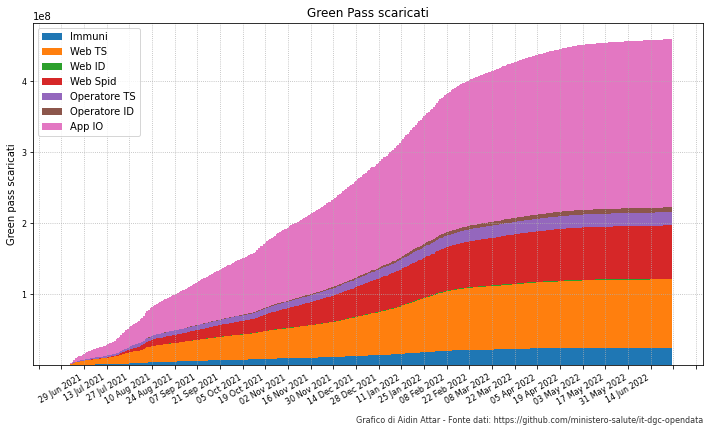

In [11]:
fig, ax = plt.subplots(figsize=(12,7))

ax.bar(acquired.data, acquired[ 'acquired_by_app_immuni_total'],                                                                                                                                                                                                                                                           width=1)
ax.bar(acquired.data, acquired[     'acquired_by_web_ts_total'], bottom=acquired['acquired_by_app_immuni_total'],                                                                                                                                                                                                          width=1)
ax.bar(acquired.data, acquired[     'acquired_by_web_id_total'], bottom=acquired['acquired_by_app_immuni_total']+acquired[    'acquired_by_web_ts_total'],                                                                                                                                                                 width=1)
ax.bar(acquired.data, acquired[   'acquired_by_web_spid_total'], bottom=acquired['acquired_by_app_immuni_total']+acquired[    'acquired_by_web_ts_total']+acquired['acquired_by_web_id_total'],                                                                                                                            width=1)
ax.bar(acquired.data, acquired['acquired_by_operator_ts_total'], bottom=acquired['acquired_by_app_immuni_total']+acquired[    'acquired_by_web_ts_total']+acquired['acquired_by_web_id_total']+acquired['acquired_by_web_spid_total'],                                                                                     width=1)
ax.bar(acquired.data, acquired['acquired_by_operator_id_total'], bottom=acquired['acquired_by_app_immuni_total']+acquired[    'acquired_by_web_ts_total']+acquired['acquired_by_web_id_total']+acquired['acquired_by_web_spid_total']+acquired['acquired_by_operator_ts_total'],                                           width=1)
ax.bar(acquired.data, acquired[     'acquired_by_app_io_total'], bottom=acquired['acquired_by_app_immuni_total']+acquired[    'acquired_by_web_ts_total']+acquired['acquired_by_web_id_total']+acquired['acquired_by_web_spid_total']+acquired['acquired_by_operator_ts_total']+acquired['acquired_by_operator_id_total'], width=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

fig.autofmt_xdate()
ax.set_title('Green Pass scaricati', fontsize=12)
ax.grid(linestyle='dotted')
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('')
ax.set_ylabel('Green pass scaricati')
labels=['Immuni', 'Web TS', 'Web ID', 'Web Spid', 'Operatore TS', 'Operatore ID', 'App IO']
ax.legend(labels, loc='upper left')
ax.text(0.9, 0.1, 'Grafico di Aidin Attar - Fonte dati: https://github.com/ministero-salute/it-dgc-opendata',
         transform=plt.gcf().transFigure,
         fontsize=8, color='black', alpha=0.8,
         ha='right', va='top', rotation='0')

plt.show()